# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Importing Dataset

In [2]:
filepath = "../data/processed/trades_2025-10-01_to_2025-10-07_1min.csv"

In [3]:
df = pd.read_csv(filepath)
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

In [4]:
counts = df["trade_count"]
log_volumes = df["cost"].apply(np.log)

# Ploting Functions

In [5]:
def plotArray(counts, title, xlabel, ylabel, filename):
    plt.figure(figsize=(18,5))
    plt.plot(counts.index, counts.values, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    file_path = os.path.join("../figures/", filename)
    plt.savefig(file_path, format='png')
    plt.show()

In [6]:
def autoCorrelationFunction(counts, title, filename):
    plt.figure(figsize=(18,5))
    pd.plotting.autocorrelation_plot(counts)
    plt.axvline(x=300, color='r', linestyle='--', linewidth=2)
    plt.title(title)
    file_path = os.path.join("../figures/", filename)
    plt.savefig(file_path, format='png')
    plt.show()

# Autocorrelarions Plots

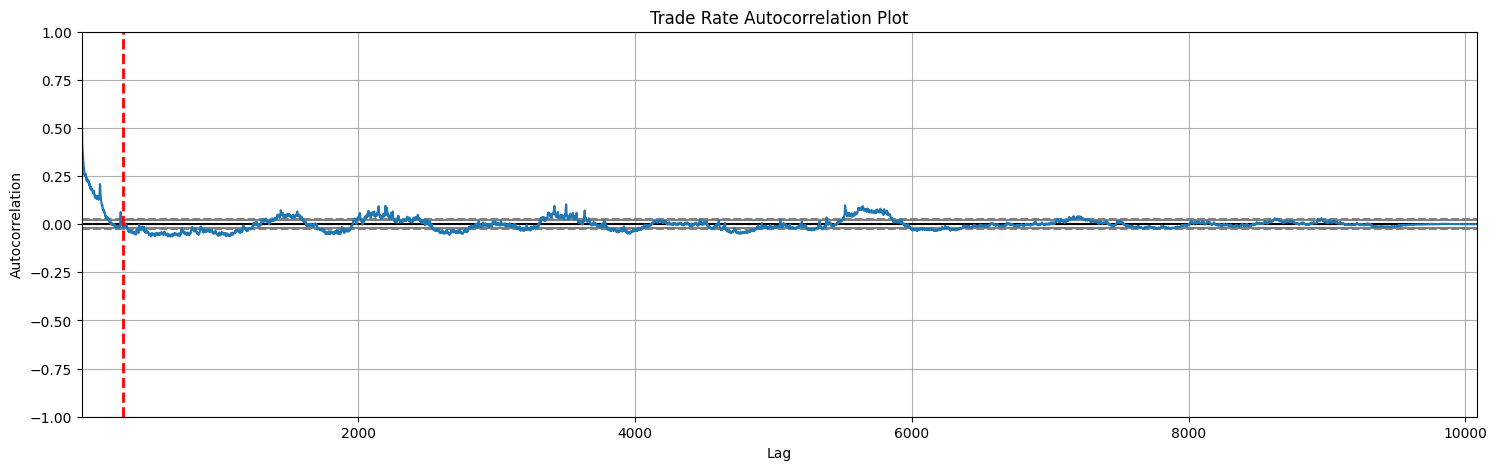

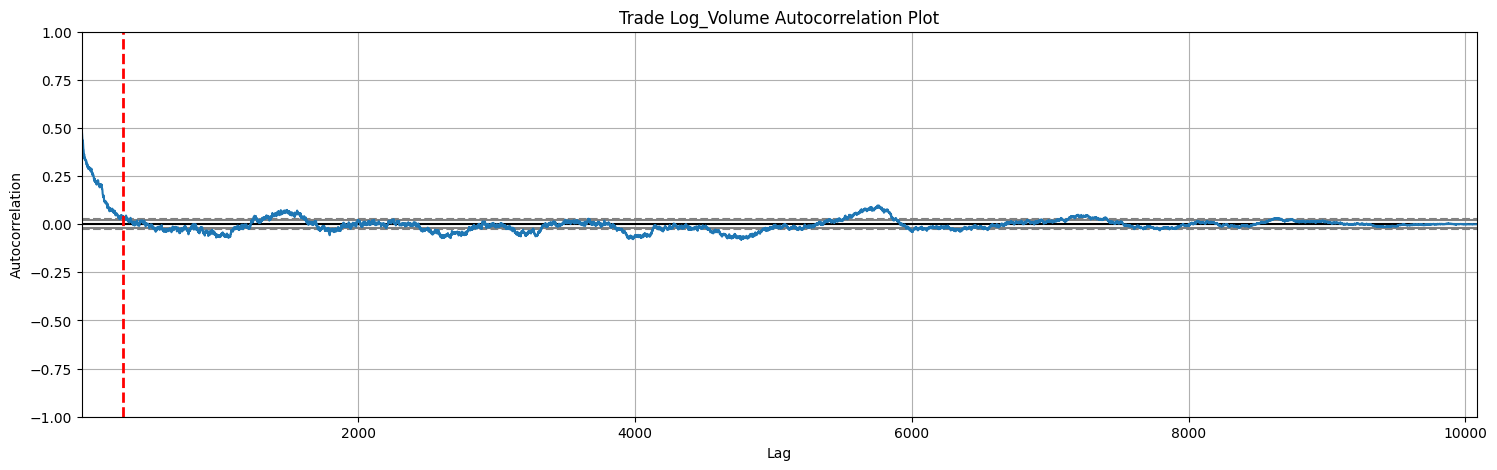

In [7]:
autoCorrelationFunction(counts, title= "Trade Rate Autocorrelation Plot", filename = "Trade_rate_autocorrelation.png")
autoCorrelationFunction(log_volumes, title ="Trade Log_Volume Autocorrelation Plot", filename = "Trade_logvolume_autocorrelation.png")

# Trade Plot

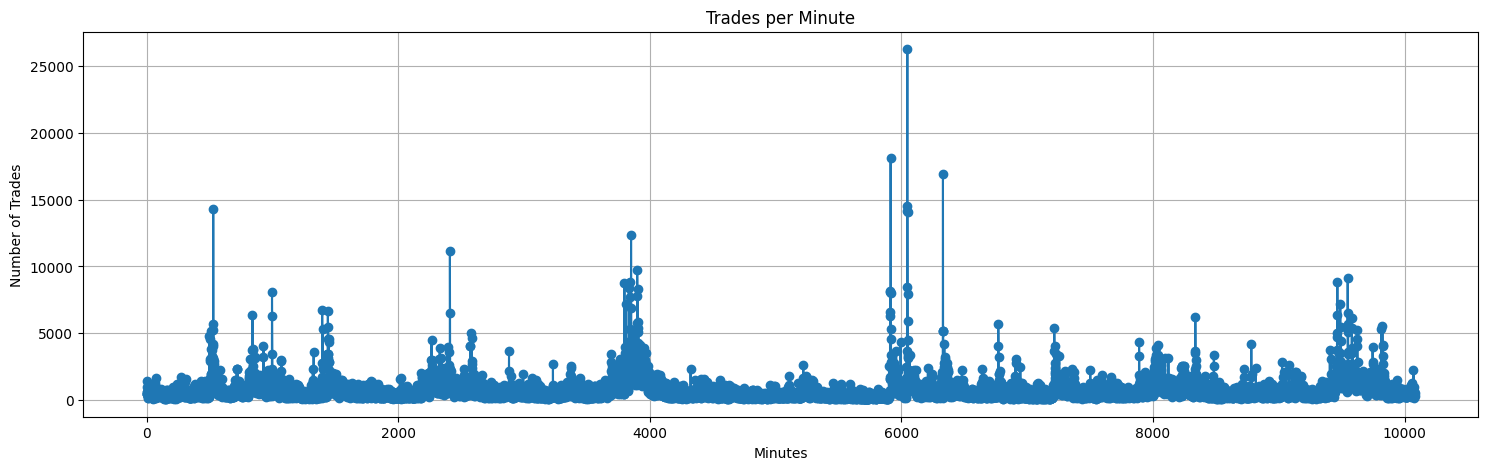

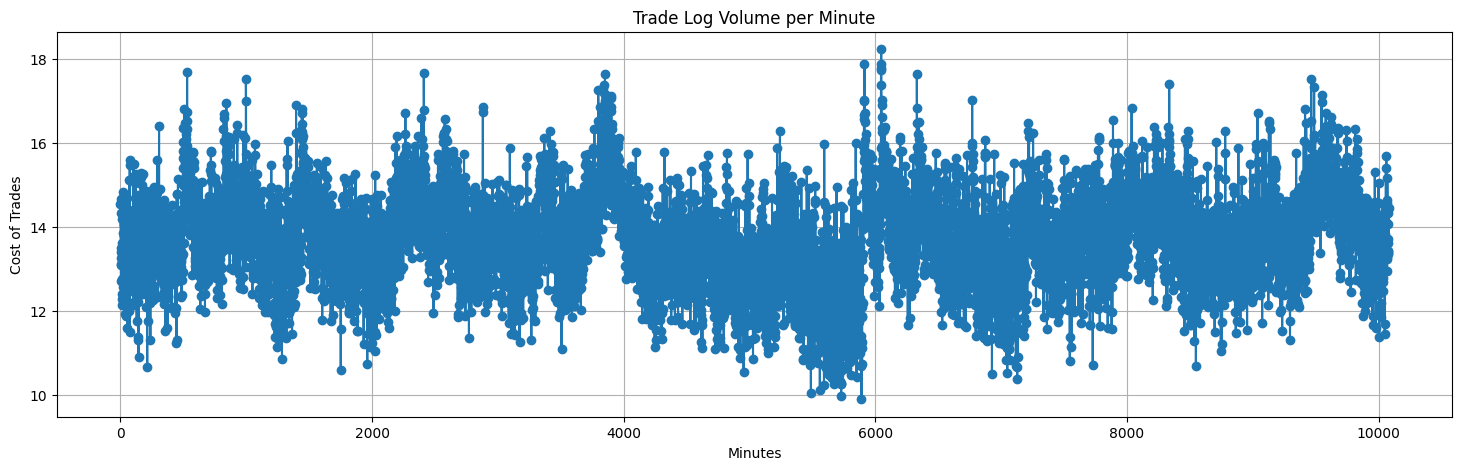

In [8]:
plotArray(counts, "Trades per Minute", "Minutes", "Number of Trades", filename = "Trade_rate.png")
plotArray(log_volumes, "Trade Log Volume per Minute", "Minutes", "Cost of Trades", filename = "Trade_logvolume.png")